## 1. The Priority Queue Abstract Data Type

### 1.1 Priority

For standby passengers, except the FIFO policy, consider the following as priority factors:
    - fare paid
    - frequen-flyer status

A collection of prioritized elements that allow arbitrary element insertion, and allows the removal of the element that has first priority.

When an element is added to a priority queue, it is provided an associated **key**
    - The element with the minimum key will be the next to be removed.
    
### 1.2 The Priority Queue ADT

The priority queue ADT need to support the following methods:

1. P.add(k,v):
    - Insert an item with the key k and value v into P
2. P.min():
    - Return a tuple (k,v) with minimum key
    - Error occurs if the queue is empty
3. P.remove_min():
    - Remove an item with minimum key from P
    - Return a tuple (k,v)
    - Error occurs if the queue is empty
4. P.is_empty():
5. len(P)

## 2. Implementing a Priority Queue

### 2.1 The composition Design Pattern

Use composition to store items internally as pairs consisting of a key k and a value v

In [1]:
class PriorityQueueBase:
    '''
    Abstract base class for a priority queue
    '''
    class _Item:
        __slots__ = '_key','_value'
        
        def __init__(self, k, v):
            self._key = k
            self._value = v
        
        def __lt__(self, other):
            # less than
            return self._key < other._key
    
    def is_empty(self):
        return len(self) == 0

### 2.2 Implemented with an Unsorted List

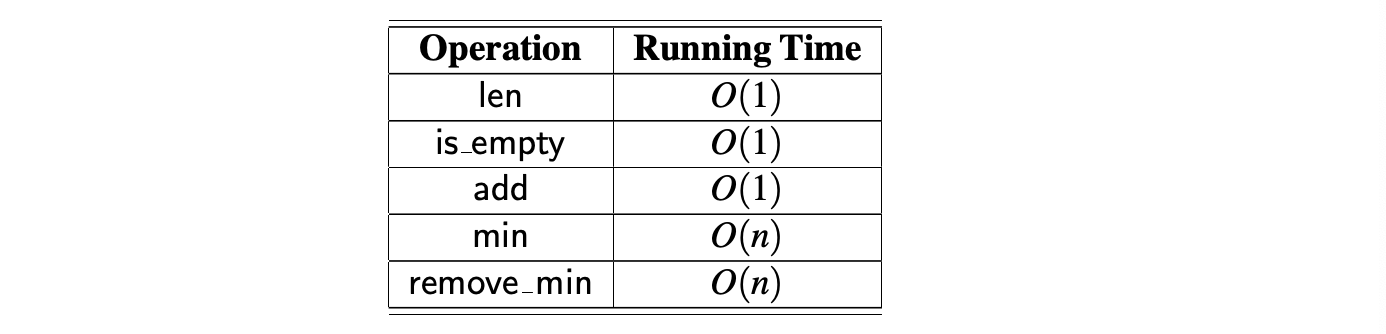

In [2]:
class UnsortedPriorityQueue(PriorityQueueBase):
    
    def _find_min(self):
        'Return Position of item with mininum key'
        if self.is_empty():
            raise Empty('Priority queue is empty')
        small = self._data.first()
        walk = self._data.after(small)
        while walk is not None:
            if walk.element() < small.element():
                small = walk
            walk = self._data.after(walk)
        return small
    
    def __init__(self):
        # Create new empty Priority Queue
        self._data = PositionalList()
        
    def __len__(self):
        return len(self._data)
    
    def add(self, key, value):
        self._data.add_last(self._Item(key, value))
        
    def find_min(self):
        p = self._find_min()
        item = p.element()
        return(item._key, item._value)
    
    def remove_min(self):
        p = self._find_min()
        item = self._data.delete(p)
        return(item._key, item._value)

### 2.3 Implementation with a Sorted List

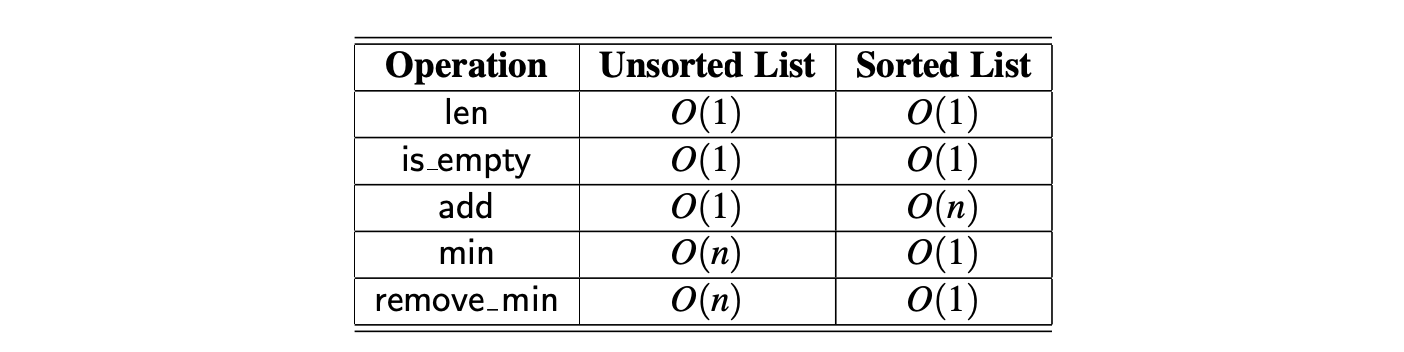

In [3]:
class SortedPriorityQueue(PriorityQueueBase):
    
    def __init__(self):
        self._data = PositionalList()
        
    def __len__(self):
        return len(self._data)
    
    def add(self, key, value):
        newest = self._Item(key, value)
        walk = self._data.last()
        while walk is not None and newest < walk.element():
            walk = self._data.before(walk)
        if walk is None:
            self._data.add_first(newest)
        else:
            self._data.add_after(walk, newest)
            
    def find_min(self):
        if self.is_empty():
            raise Empty('Priority queue is empty')
        p = self._data.first()
        item = p.element()
        return (item._key, item._value)
    
    def remove_min(self):
        if self.is_empty():
            raise Empty('Priority queue is empty')
        item = self._data.delete(self._data.first())
        return (item._key, item._value)

## 3. Heaps

Binary Heap 二叉堆
<br>
Perform both insertion and removals in logarithmic time.

### 3.1 The Heap Data Structure

A heap is a binary tree T stores a collection of items at its positions and satisfies two additional properties.

1. Heap-Order Property:
    - Relational property
    - In a heap T, for every position p other than the root, the key stored at p is greater than or equal to the key stored at p's parent
    - The keys encountered on a path from the root to a leaf of T are in nondecreasing order
    - Minimum key is always stored at the root of T

2. Complete Binary Tree Property:
    - Structural Property
    - A heap T with height h is a complete binary tree if levels 0,1,..., h-1 of T have the maximum number of nodes (2^i)
    - The remaining nodes at level h reside in the leftmost possible positions at that level
    - Leftmost: Level numbering in the context of an array-based representation.
    
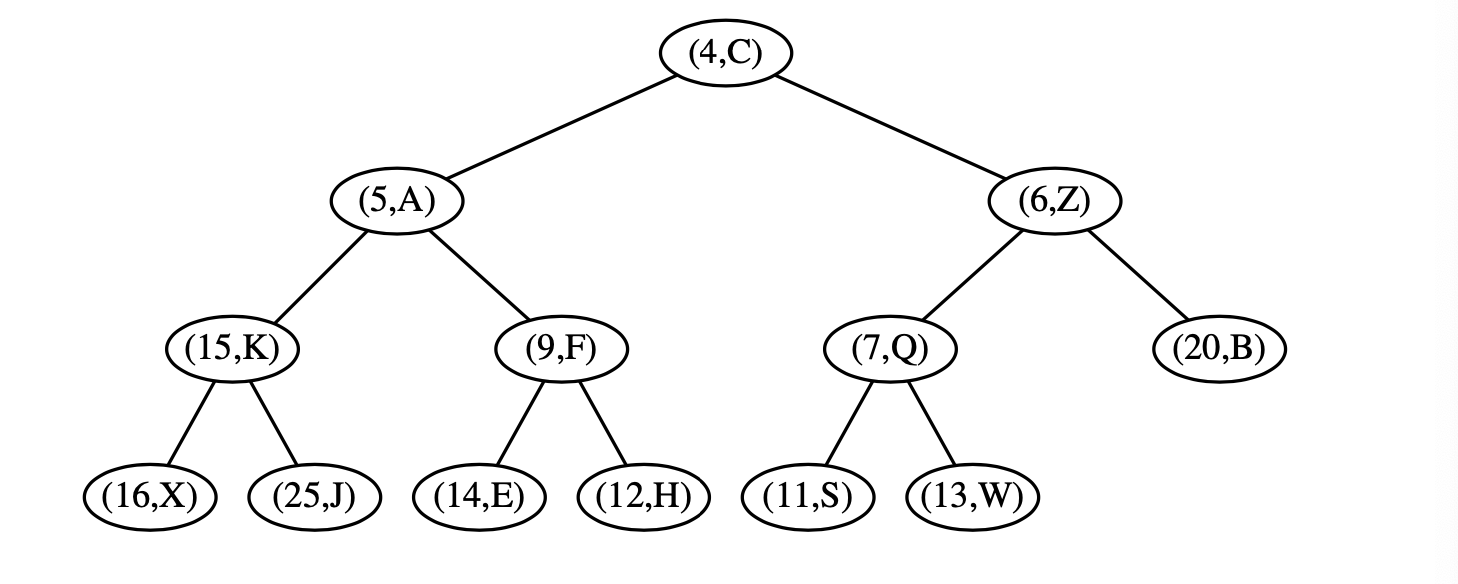

#### The Height of a Heap

A heap T stroing n entries has height n = logn (向下取整)

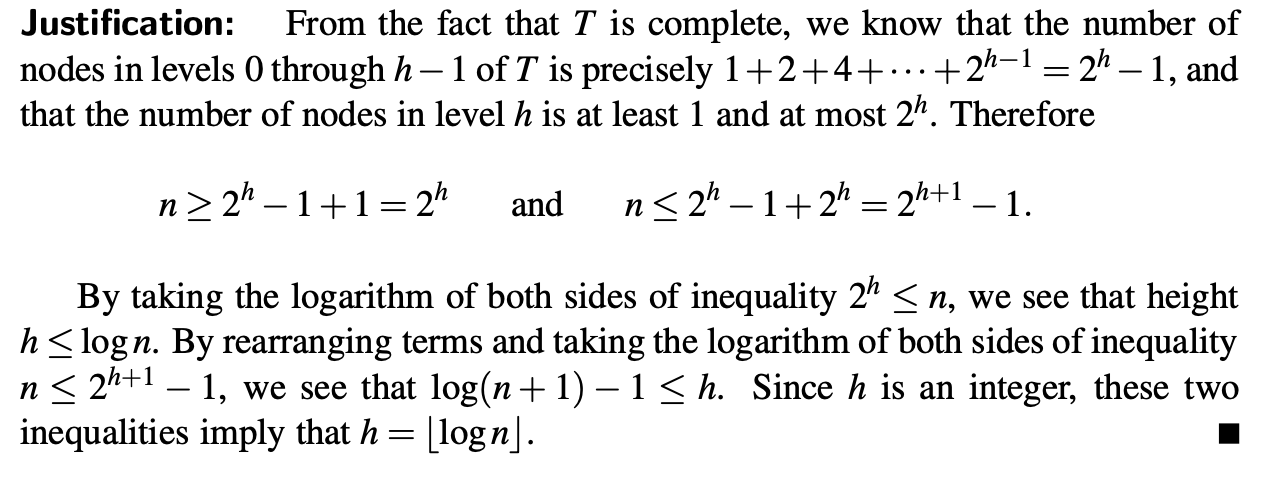

### 3.2 Implementing a Priority Queue with a Heap

#### Add Method

1. Adding an Item to the Heap
    - If the Heap is empty or bottom level is full
        - leftmost position of a new level
    - Or
        - Just beyond the rightmost node at the bottom level

2. Up-Heap Bubbling After an Insertion
    - 如果新Item的key比其parent的key大，互换两个node的位置，until satisfy the Heap-Order Property
    - 最多需要换h（height）次，即logn
    
#### remove_min Method

1. Removing the item with Minimum key
    - Copy the item from the last postion(rightmost at the bottommost level) to the root
    - Remove the node at the last position
    
2. Down-Heap Bubbling After a Removal
    - 在无右子树时，比较与left child的key值，不满足Heap-Order则互换
    - 比较与left child和right child中最小的key值，不满足Heap-Order则互换
    - 最多需要换h（height）次，即logn


### 3.3 Array-Based Representation of a Complete Binary Tree

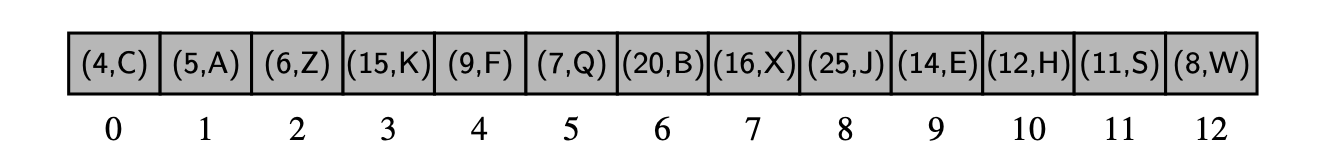

### 3.4 Python Heap Implementation



In [4]:
class HeapPriorityQueue(PriorityQueueBase):
    
    #-----------------nonpublic behaviors------------------------------
    def _parent(self, j):
        return (j-1) // 2
    
    def _left(self, j):
        return 2*j + 1
    
    def _right(self, j):
        return 2*j + 2
    
    def _has_left(self, j):
        return self._left(j) < len(self._data)
    
    def _has_right(self, j):
        return self._right(j) < len(self._data)
    
    def _swap(self, i, j):
        self._data[i], self._data[j] = self._data[j], self._data[i]
        
    def _upheap(self, j):
        parent = self._parent(j)
        if j > 0 and self._data[j] < self._data[parent]:
            self._swap(j, parent)
            self._upheap(parent)
            
    def _downheap(self, j):
        if self._has_left(j):
            left = self._left(j)
            small_child = left
            if self._has_right(j):
                right = self._right(j)
                if self._data[right] < self._data[left]:
                    small_child = right
            if self._data[small_child] < self._data[j]:
                self._swap(j, small_child)
                self._downheap(small_child)
                
    #--------------------public behaviors------------------------------
    def __init__(self):
        self._data = []
        
    def __len__(self):
        return len(self._data)
    
    def add(self, key, value):
        self._data.append(self._Item(key, value))
        self._upheap(len(self._data) - 1)
        
    def find_min(self):
        if self.is_empty():
            raise Empty('Priority queue is empty')
        item = self_data[0]
        return (item._key, item._value)
    
    def remove_min(self):
        if self.is_empty():
            raise Empty('Priority queue is empty')
        self._swap(0, len(self._data) - 1)
        item = self._data.pop()
        self._downheap(0)
        return (item._key, item._value)

### 3.5 Analysis of a Heap-Based Priority Queue

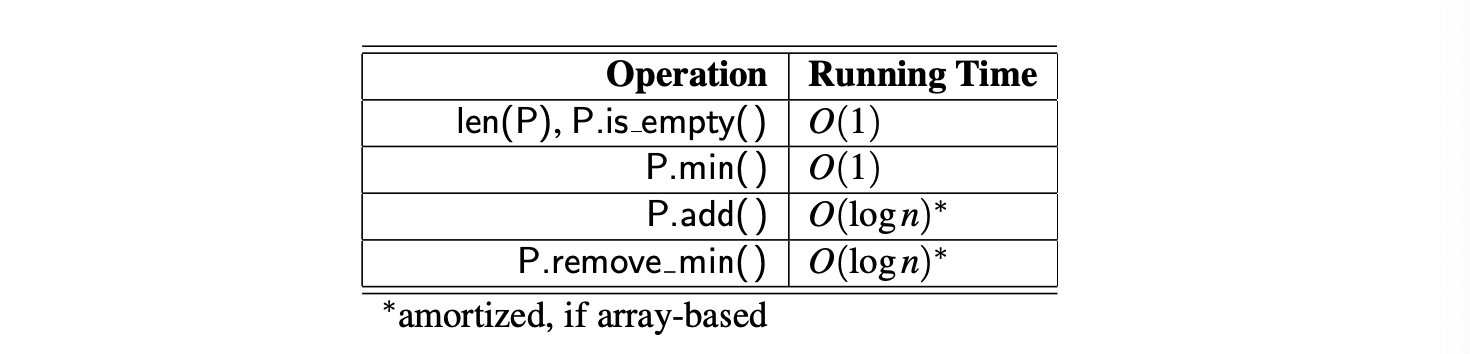

### 3.6 Bottom-Up Heap Construction

When start from an empty heap, n successive calls to the add operation will run in:
1. Traditional Heap:
    -  O(nlogn) time in the worst case.
2. Bottom-Up Heap Construction:
    - O(n)
    
Assume the the heap is a complete binary tree with every level being full, and has the following properties:
    
$$n = 2^{h+1} + 1$$
$$h = log(n+1) - 1$$
<br>
$$\text{Level h has } 2^h \text{nodes}$$

The construction will need h+1 = log(n+1) steps

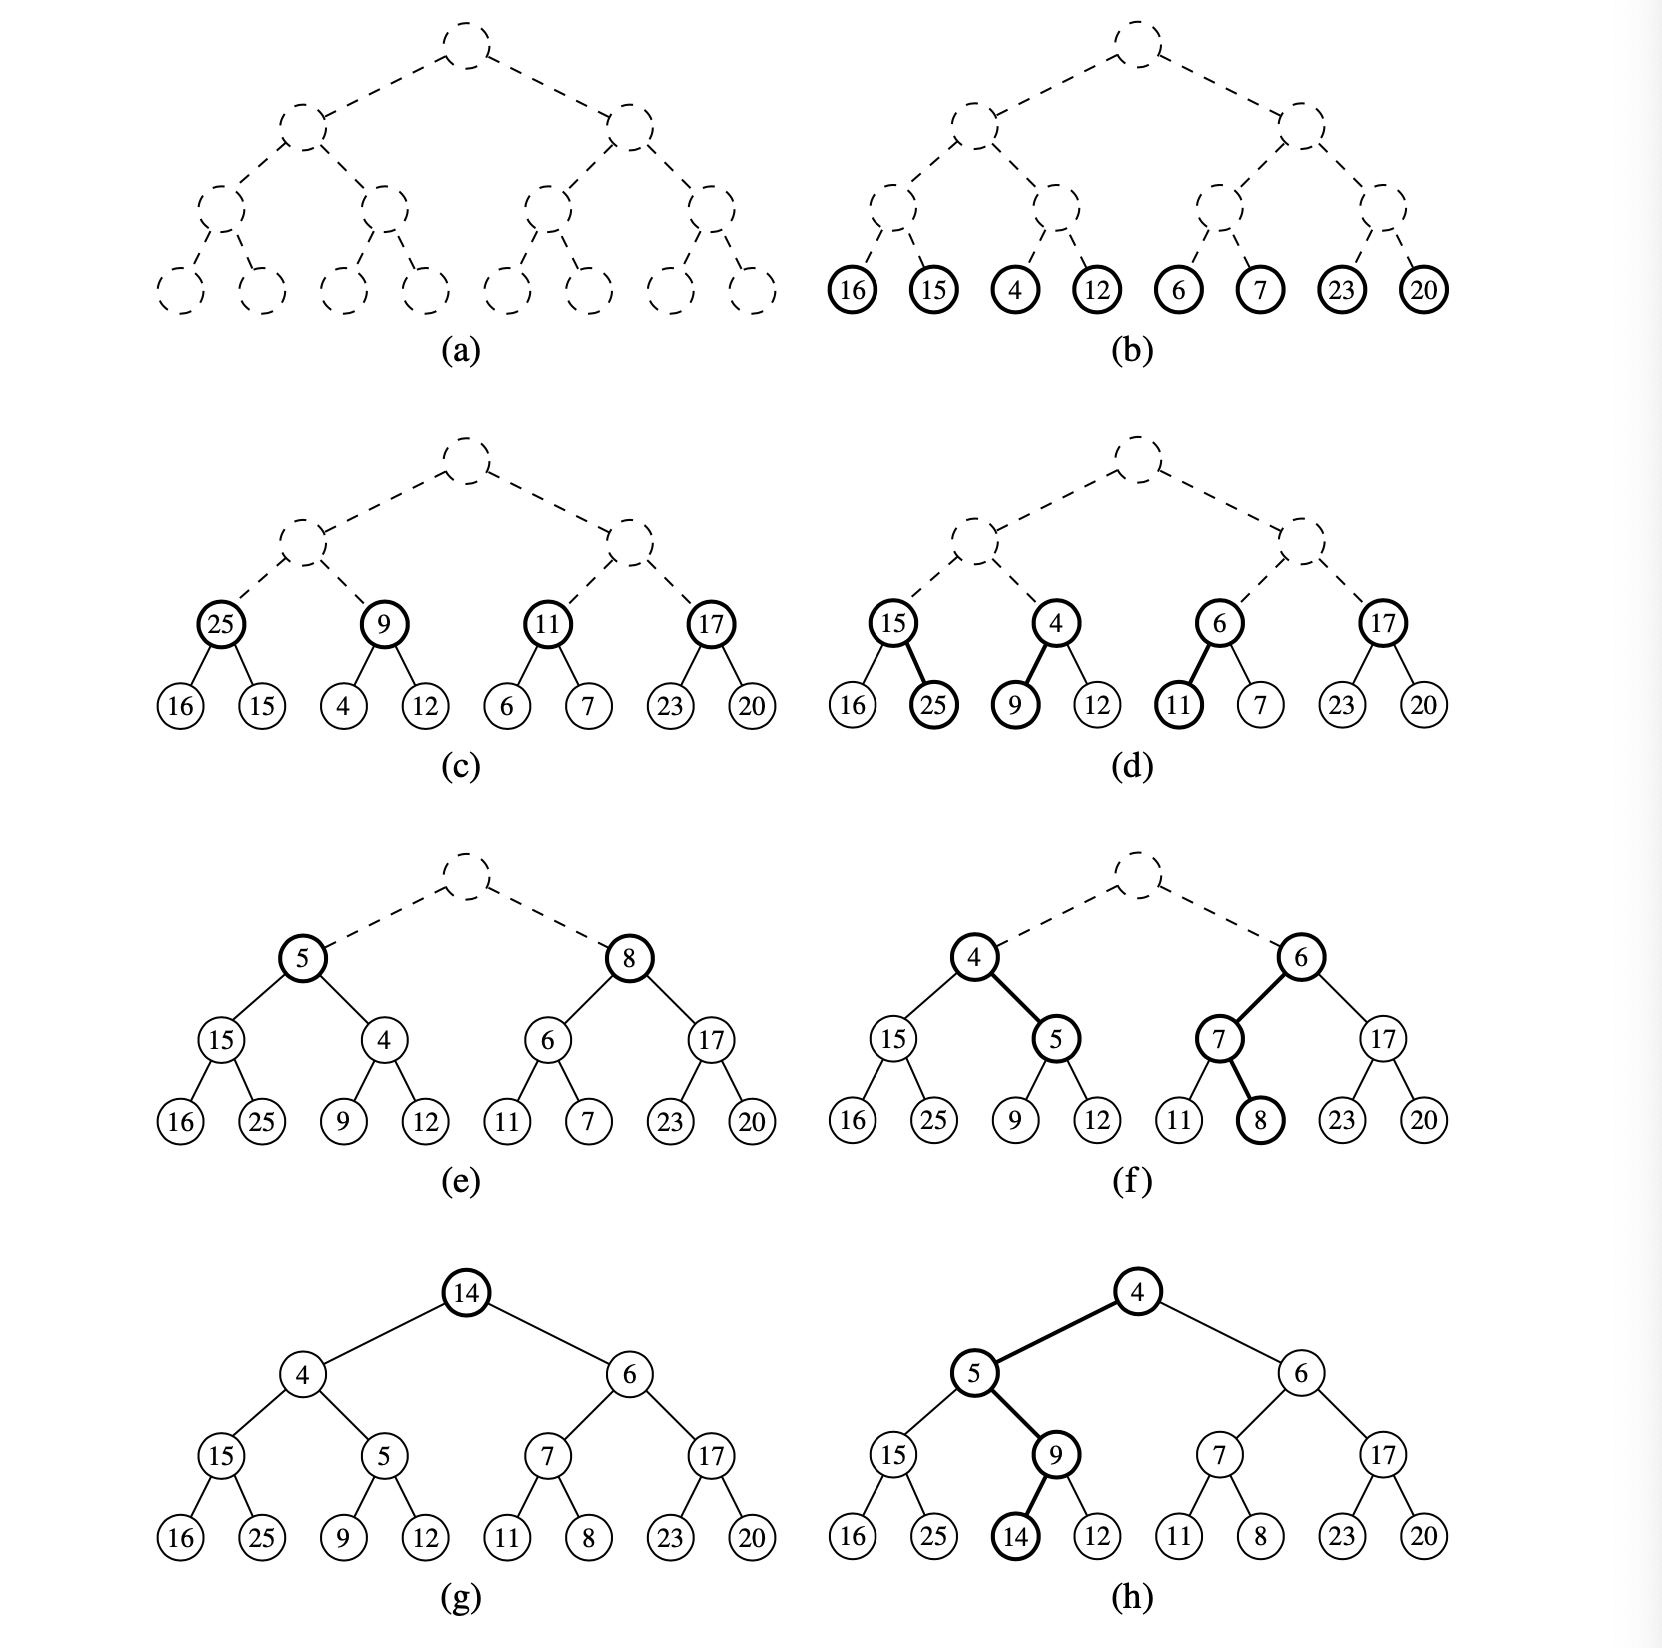

#### Python Implementation of a Bottom-Up Heap Construction



In [5]:
class BottomUpHeap(HeapPriorityQueue):
    def __init__(self, contents = ()):
        '''
        By default, queue will be empty. If contents is given, 
        it should be as an iterable sequence of (k,v) tuples 
        specifying the initial contents.
        '''
        self._data = [self._Item(k,v) for k,v in contents]
        if len(self._data) > 1:
            self._heapify()
            
    def _heapify(self):
        start = self._parent(len(self) - 1)
        for j in range(start, -1, -1):
            self._downheap(j)

#### Asymptotic Analysis of Bottom-Up Heap Construction

Bottom-up construction are performing
    - A single down-heap operation at each nonleaf position in the tree
    - Rather than a single up-heap operation from each
Since more nodes are closer to the bottom than the top:
    - The sum of the downward paths is linear O(n)

## 4. Sorting with a Priority Queue

#### Use Priority Queue to sort 

In [6]:
def pq_sort(C):
    '''
    Sort a collection of elements stored in a positional list
    '''
    n = len(C)
    P = PriorityQueue()
    # Insert all element into an empty priority Queue
    for j in range(n):
        element = C.delete(C.first())
        # Use element as key and value
        P.add(element, element)
    # Call remove_min to retrieve the element in nondecreasing order
    for j in range(n):
        (k,v) = P.remove_min()
        C.add_last(v)

### 4.1 Selection-Sort and Insertion-Sort

#### Selection-Sort

Implement the pq_sort with an unsorted list.
1. Phase 1: Insert all element into an empty priority queue
    - O(n)
2. Phase 2: Call remove_min to retrieve the element in nondecreasing order
    - O(n^2)

#### Insertion-Sort

Implement the pq_sort with an sorted list.
1. Phase 1: Insert all element into an empty priority queue
    - O(n^2)
2. Phase 2: Call remove_min to retrieve the element in nondecreasing order
    - O(n)


### 4.2 Heap-Sort

#### Heap-Sort
    - O(nlogn)
    
#### Implementing Heap-Sort In-Place

If the collection C to be sorted is implemented by means of an array-based sequence, (usually a Python list), we can speed up heap-sort and reduce its space requirement using a portion of the list itself to store the heap.
1. Redefine the heap operations to be a maximum-oriented heap.
    - Parent的key值大于等于其child的key
    - 原collection C的左边存储heap，右边存储排序后的sequence
2. Start with an empty heap and move the boundary between the heap and the sequence from left to right. 
    - 从左到右依次把C中的element加入到heap中
    - 即按heap add-element algorithm 把元素加入到heap里
3. Start with an empty sequence and move the boundary between the heap and the sequence from right to left.
    - 此时C中最大的元素在最左边，依次把最左边的数放到sequence中
    
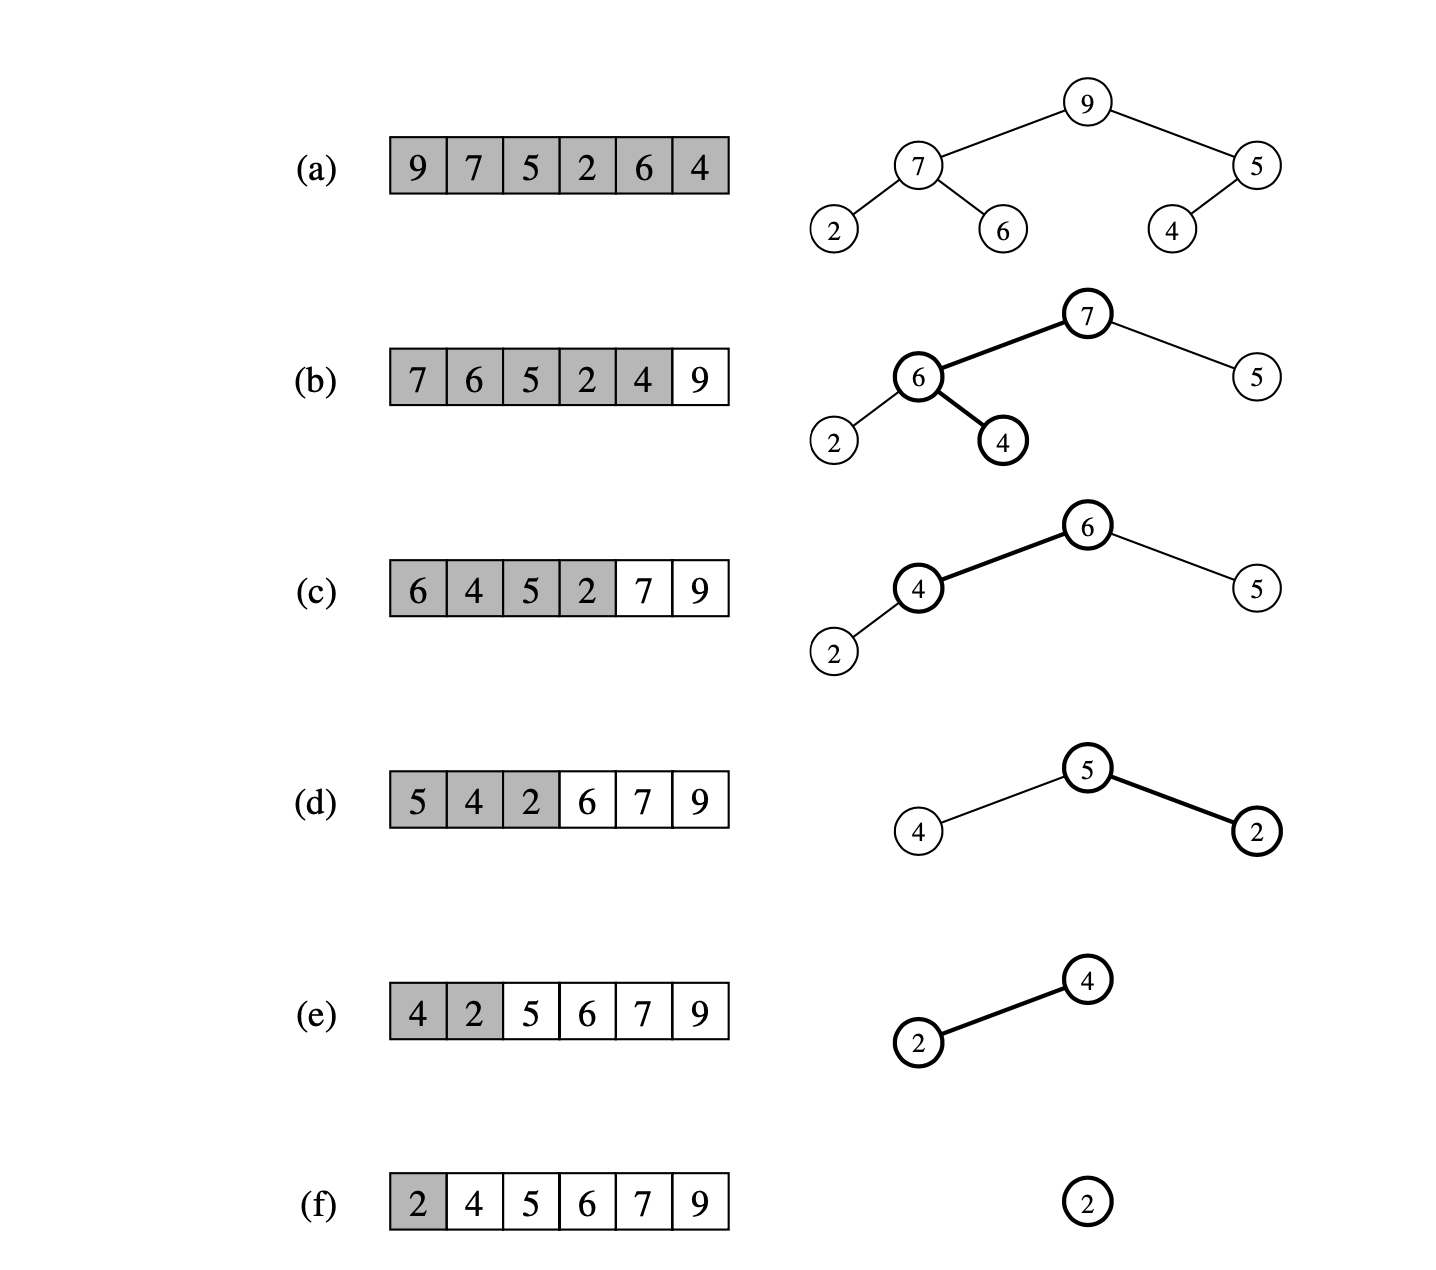

## 5. Adaptable Priority Queues

Provide additional methods
1. remove
    - remove an arbitrary entry
2. update
    - replace the key of an existing entry with a new key
    
### 5.1 Locators

When a new element is added to the priority queue, return a special object as a locator to the caller.

1. P.update(loc, k, v)
    - Replace key and value for the item identified by locator loc
2. P.remove(loc)
    - Remove the item identified by the locator loc
    - Return its (key value) pair
    
### 5.2 Implementing an Adaptable Priority Queue

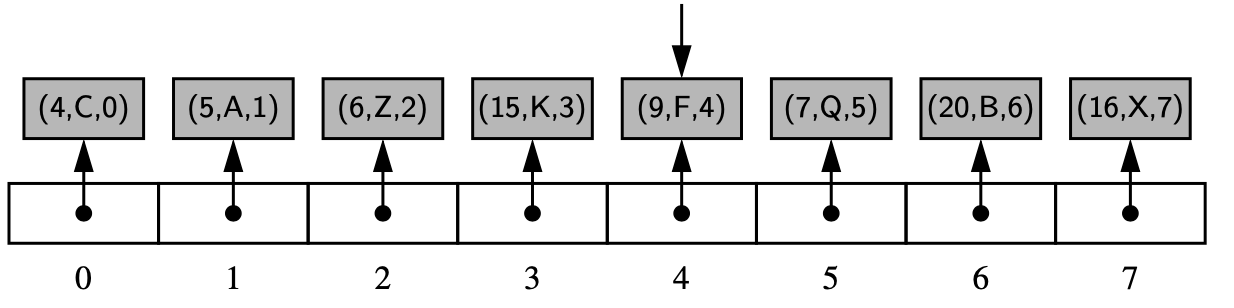


In [7]:
class AdaptableHeapPriorityQueue(HeapPriorityQueue):
    
    #-----------------nested Locator class-----------------------------
    class Locator(HeapPriorityQueue._Item):
        'Token for locating an entry of the priority queue'
        # add index as additional field
        __slots__ = '_index'
        
        def __init__(self, k, v, j):
            super().__init__(k,v)
            self._index = j
            
    #-----------------Nonpublic behaviors------------------------------
    # override swap to record new indices
    def _swap(self,i,j):
        super().swap(i,j)
        self._data[i]._index = i
        self._data[j]._index = j
        
    def _bubble(self, j):
        if j > 0 and self._data[j] < self._data[self._parent(j)]:
            self._upheap(j)
        else:
            self._downheap(j)
            
    #-----------------Public Methods-----------------------------------
    def add(self, key, value):
        token = self.Locator(key, value, len(self._data))
        self._data.append(token)
        self._upheap(len(self._data) - 1)
        return token
    
    def update(self, loc, newkey, newval):
        j = loc._index
        if not (0 <= j < len(self) and self._data[j] is loc):
            raise ValueError('Invalid locator')
        loc._key = newkey
        loc._value = newval
        self._bubble(j)
        
    def remove(self, loc):
        j = loc._index
        if not(0<= j < len(self) and self._data[j] is loc):
            raise ValueError('Invalid locator')
        # item at last position
        if j == len(self) - 1:
            self._data.pop() 
        else:
            # swap item to the last position
            self._swap(j, len(self) - 1)
            self._data.pop()
            self._bubble(j)
        return (loc._key, loc._value)

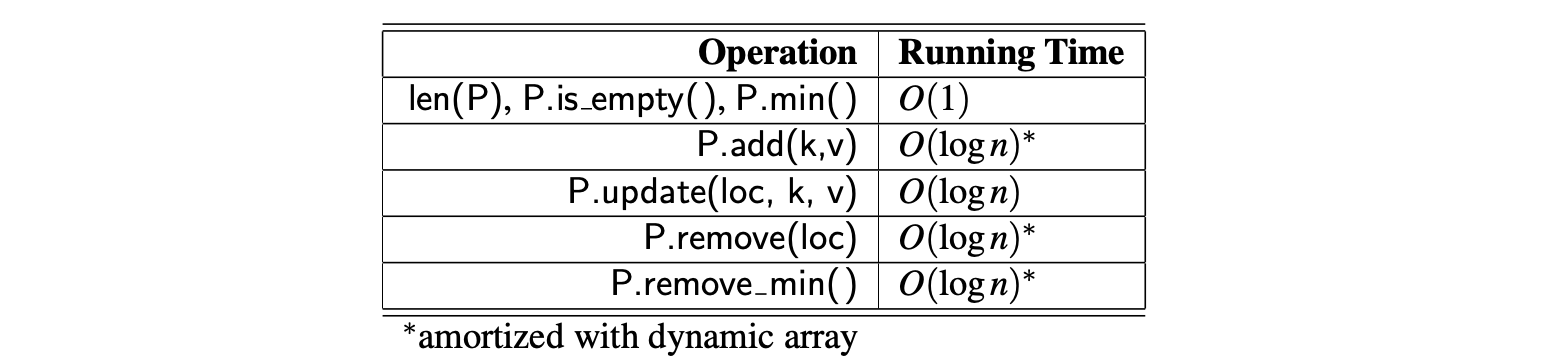